In [14]:
# C = 1
# This Code uses PI_T from the above cell

C = 1
T = 20  
t = 1/T
M = 4


t_j = t

S_j = M*3
s_j = 1/S_j

rho_j = t_j/s_j
N_j = rho_j/(1-rho_j)
NQ_j = N_j - rho_j
R_j = N_j/t_j
W_j = R_j - S_j



if "Theoretical" not in PI_T["RHO"].columns:
    PI_T["RHO"].insert(0, "Theoretical", [rho_j])
else:
    PI_T["RHO"]["Theoretical"] = [rho_j]

if "Theoretical" not in PI_T["S"].columns:
    PI_T["S"].insert(0, "Theoretical", [S_j])
else:
    PI_T["S"]["Theoretical"] = [S_j]

if "Theoretical" not in PI_T["NQ"].columns:
    PI_T["NQ"].insert(0, "Theoretical", [NQ_j])
else:
    PI_T["NQ"]["Theoretical"] = [NQ_j]

if "Theoretical" not in PI_T["W"].columns:
    PI_T["W"].insert(0, "Theoretical", [W_j])
else:
    PI_T["W"]["Theoretical"] = [W_j]

for key in PI_T:
    PI_T[key]["OK"] = [""] * 1
    for i in range(1):
        if PI_T[key]["Theoretical"].iloc[i] <= PI_T[key]["CI (UB)"].iloc[i] and PI_T[key]["Theoretical"].iloc[i] >= PI_T[key]["CI (LB)"].iloc[i]:
            PI_T[key].loc[f"Q{i}", "OK"] = "V"
        else:
            PI_T[key].loc[f"Q{i}", "OK"] = ""

for key in PI_T:
    print(f"    [{key}]")
    print(PI_T[key])
    print("\n")


    [NQ]
    Theoretical      Mean   CI (LB)  CI (UB) OK
Q0          0.9  0.885351  0.860712  0.90999  V


    [RHO]
    Theoretical      Mean   CI (LB)   CI (UB) OK
Q0          0.6  0.599998  0.596635  0.603361  V


    [S]
    Theoretical       Mean    CI (LB)   CI (UB) OK
Q0           12  12.008659  11.957638  12.05968  V


    [W]
    Theoretical       Mean   CI (LB)    CI (UB) OK
Q0         18.0  17.703197  17.25065  18.155744  V




In [83]:
from scipy.integrate import quad

M = 4
K = 1

def integrand(x):
    return ((x)*(1/M)*math.exp(-x/M))

def integrand_T(x):
    return ((x)*(1/M)*math.exp(-(x+K)/M))

alphaK = 1 - math.exp(-K/M)

S = ((quad(integrand, K, np.inf)[0])/(1-alphaK))

SS = ((quad(integrand, 0, np.inf)[0]))
print(S)
print(SS)

5.0
3.9999999999999996


In [96]:
# C = 2 DISCRETE
# This Code uses PI_T from the above cell
from scipy.integrate import quad
import math
import numpy as np

C = 2
p = 0.5
T = 15
t = 1/T
M = 10
K = 6
sT = 1
alphaK = 1 - math.exp(-(K-0.5)/(M-1))

def integrand(x):
    return (math.floor((x+1+0.5))*(1/(M-1))*math.exp(-x/(M-1)))

def integrand_2(x):
    return ((((math.floor(x+1+0.5))**2))*(1/(M-1))*math.exp(-x/(M-1)))


pi_i = alphaK/(C*p)
t_i = t*pi_i

S_i = round(((quad(integrand, 0, K-0.5)[0])/alphaK)*sT, 6)
s_i = 1/S_i

Var_S_i = round(((quad(integrand_2, 0, K-0.5)[0])/alphaK)*sT, 6) - S_i**2

rho_i = t_i/s_i
# N_i = rho_i/(1-rho_i)
N_i = rho_i + ((rho_i**2 + t_i**2 * Var_S_i)/(2*(1-rho_i)))
NQ_i = N_i - rho_i
R_i = N_i/t_i
W_i = R_i - S_i


pi_j = (1-alphaK)/(C*(1-p))
t_j = t*pi_j

S_j = round(((quad(integrand, K-0.5, np.inf)[0])/(1-alphaK))*sT, 6)
print(S_j)
s_j = 1/S_j

Var_S_j = round(((quad(integrand_2, K-0.5, np.inf)[0])/(1-alphaK))*sT, 6) - S_j**2

rho_j = t_j/s_j
# N_j = rho_j/(1-rho_j)
N_j = rho_j + ((rho_j**2 + t_j**2 * Var_S_j)/(2*(1-rho_j)))
print(N_j)
NQ_j = N_j - rho_j
R_j = N_j/t_j
W_j = R_j - S_j



if "Theoretical" not in PI_T["RHO"].columns:
    PI_T["RHO"].insert(0, "Theoretical", [rho_i, rho_j])
else:
    PI_T["RHO"]["Theoretical"] = [rho_i, rho_j]

if "Theoretical" not in PI_T["S"].columns:
    PI_T["S"].insert(0, "Theoretical", [S_i, S_j])
else:
    PI_T["S"]["Theoretical"] = [S_i, S_j]

if "Theoretical" not in PI_T["NQ"].columns:
    PI_T["NQ"].insert(0, "Theoretical", [NQ_i, NQ_j])
else:
    PI_T["NQ"]["Theoretical"] = [NQ_i, NQ_j]

if "Theoretical" not in PI_T["W"].columns:
    PI_T["W"].insert(0, "Theoretical", [W_i, W_j])
else:
    PI_T["W"]["Theoretical"] = [W_i, W_j]

for key in PI_T:
    PI_T[key]["OK"] = [""] * 2
    for i in range(2):
        if PI_T[key]["Theoretical"].iloc[i] <= PI_T[key]["CI (UB)"].iloc[i] and PI_T[key]["Theoretical"].iloc[i] >= PI_T[key]["CI (LB)"].iloc[i]:
            PI_T[key].loc[f"Q{i}", "OK"] = "V"
        else:
            PI_T[key].loc[f"Q{i}", "OK"] = ""

for key in PI_T:
    print(f"    [{key}]")
    print(PI_T[key])
    print("\n")


15.508641
1.040603920315654
    [NQ]
    Theoretical      Mean   CI (LB)   CI (UB) OK
Q0     0.007501  0.007529  0.007440  0.007617  V
Q1     0.479452  0.478892  0.473002  0.484782  V


    [RHO]
    Theoretical      Mean   CI (LB)   CI (UB) OK
Q0     0.105184  0.105084  0.104810  0.105358  V
Q1     0.561152  0.561635  0.560167  0.563102  V


    [S]
    Theoretical       Mean    CI (LB)    CI (UB) OK
Q0     3.450526   3.447667   3.443462   3.451872  V
Q1    15.508641  15.526307  15.502872  15.549741  V


    [W]
    Theoretical       Mean    CI (LB)    CI (UB) OK
Q0     0.246075   0.246982   0.244253   0.249710  V
Q1    13.250698  13.236690  13.084869  13.388511  V




C:\Users\giova\AppData\Local\Temp\ipykernel_13668\1521803138.py:26: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  S_i = round(((quad(integrand, 0, K-0.5)[0])/alphaK)*sT, 6)
C:\Users\giova\AppData\Local\Temp\ipykernel_13668\1521803138.py:29: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the 

In [98]:
# C = 2
# This Code uses PI_T from the above cell
from scipy.integrate import quad
import math
import numpy as np

C = 2
p = 0.5
T = 15
t = 1/T
M = 10
K = 6
sT = 1
alphaK = 1 - math.exp(-K/M)

def integrand(x):
    return ((x)*(1/M)*math.exp(-x/M))

def integrand_2(x):
    return ((x**2)*(1/M)*math.exp(-x/M))


pi_i = alphaK/(C*p)
t_i = t*pi_i

S_i = round(((quad(integrand, 0, K)[0])/alphaK)*sT, 6)
s_i = 1/S_i

Var_S_i = round(((quad(integrand_2, 0, K)[0])/alphaK)*sT, 6) - S_i**2

rho_i = t_i/s_i
# N_i = rho_i/(1-rho_i)
N_i = rho_i + ((rho_i**2 + t_i**2 * Var_S_i)/(2*(1-rho_i)))
NQ_i = N_i - rho_i
R_i = N_i/t_i
W_i = R_i - S_i


pi_j = (1-alphaK)/(C*(1-p))
t_j = t*pi_j

S_j = round(((quad(integrand, K, np.inf)[0])/(1-alphaK))*sT, 6)
print(S_j)
s_j = 1/S_j

Var_S_j = round(((quad(integrand_2, K, np.inf)[0])/(1-alphaK))*sT, 6) - S_j**2

rho_j = t_j/s_j
# N_j = rho_j/(1-rho_j)
N_j = rho_j + ((rho_j**2 + t_j**2 * Var_S_j)/(2*(1-rho_j)))
print(N_j)
NQ_j = N_j - rho_j
R_j = N_j/t_j
W_j = R_j - S_j



if "Theoretical" not in PI_T["RHO"].columns:
    PI_T["RHO"].insert(0, "Theoretical", [rho_i, rho_j])
else:
    PI_T["RHO"]["Theoretical"] = [rho_i, rho_j]

if "Theoretical" not in PI_T["S"].columns:
    PI_T["S"].insert(0, "Theoretical", [S_i, S_j])
else:
    PI_T["S"]["Theoretical"] = [S_i, S_j]

if "Theoretical" not in PI_T["NQ"].columns:
    PI_T["NQ"].insert(0, "Theoretical", [NQ_i, NQ_j])
else:
    PI_T["NQ"]["Theoretical"] = [NQ_i, NQ_j]

if "Theoretical" not in PI_T["W"].columns:
    PI_T["W"].insert(0, "Theoretical", [W_i, W_j])
else:
    PI_T["W"]["Theoretical"] = [W_i, W_j]

for key in PI_T:
    PI_T[key]["OK"] = [""] * 2
    for i in range(2):
        if PI_T[key]["Theoretical"].iloc[i] <= PI_T[key]["CI (UB)"].iloc[i] and PI_T[key]["Theoretical"].iloc[i] >= PI_T[key]["CI (LB)"].iloc[i]:
            PI_T[key].loc[f"Q{i}", "OK"] = "V"
        else:
            PI_T[key].loc[f"Q{i}", "OK"] = ""

for key in PI_T:
    print(f"    [{key}]")
    print(PI_T[key])
    print("\n")


16.0
1.1601158128099827
    [NQ]
    Theoretical      Mean   CI (LB)   CI (UB) OK
Q0     0.005045  0.005054  0.004989  0.005118  V
Q1     0.574717  0.574206  0.566769  0.581643  V


    [RHO]
    Theoretical      Mean   CI (LB)   CI (UB) OK
Q0     0.081268  0.081183  0.080950  0.081416  V
Q1     0.585399  0.585900  0.584351  0.587449  V


    [S]
    Theoretical       Mean    CI (LB)    CI (UB) OK
Q0     2.701785   2.699077   2.694512   2.703643  V
Q1    16.000000  16.019284  15.992922  16.045646  V


    [W]
    Theoretical       Mean    CI (LB)    CI (UB) OK
Q0     0.167733   0.168000   0.165962   0.170038  V
Q1    15.708032  15.696791  15.506275  15.887308  V




In [8]:
# DOUBLE numOfItems
# This Code uses PI_T from the above cell
from scipy.integrate import quad
import math
import numpy as np

C = 4
p = 0.5
T = 20
t = 1/T
M = 10
K = 8
alphaK = 1 - math.exp(-K/M)

def integrand(x):
    return ((x)*(1/M)*math.exp(-x/M))


pi_i = alphaK/(C*p)
t_i = t*pi_i

S_i = round(((quad(integrand, 0, K)[0])/alphaK)*3, 6)
s_i = 1/S_i

rho_i = t_i/s_i
N_i = rho_i/(1-rho_i)
NQ_i = N_i - rho_i
R_i = N_i/t_i
W_i = R_i - S_i


pi_j = (1-alphaK)/(C*(1-p))
t_j = t*pi_j

S_j = round(((quad(integrand, K, np.inf)[0])/(1-alphaK))*3, 6)
s_j = 1/S_j

rho_j = t_j/s_j
N_j = rho_j/(1-rho_j)
NQ_j = N_j - rho_j
R_j = N_j/t_j
W_j = R_j - S_j



if "Theoretical" not in PI_T["RHO"].columns:
    PI_T["RHO"].insert(0, "Theoretical", [rho_i, rho_i, rho_j, rho_j])
else:
    PI_T["RHO"]["Theoretical"] = [rho_i, rho_i, rho_j, rho_j]

if "Theoretical" not in PI_T["S"].columns:
    PI_T["S"].insert(0, "Theoretical", [S_i, S_i, S_j, S_j])
else:
    PI_T["S"]["Theoretical"] = [S_i, S_i, S_j, S_j]

if "Theoretical" not in PI_T["NQ"].columns:
    PI_T["NQ"].insert(0, "Theoretical", [NQ_i, NQ_i, NQ_j, NQ_j])
else:
    PI_T["NQ"]["Theoretical"] = [NQ_i, NQ_i, NQ_j, NQ_j]

if "Theoretical" not in PI_T["W"].columns:
    PI_T["W"].insert(0, "Theoretical", [W_i, W_i, W_j, W_j])
else:
    PI_T["W"]["Theoretical"] = [W_i, W_i, W_j, W_j]

for key in PI_T:
    PI_T[key]["OK"] = [""] * 4
    for i in range(4):
        if PI_T[key]["Theoretical"].iloc[i] <= PI_T[key]["CI (UB)"].iloc[i] and PI_T[key]["Theoretical"].iloc[i] >= PI_T[key]["CI (LB)"].iloc[i]:
            PI_T[key].loc[f"Q{i}", "OK"] = "V"
        else:
            PI_T[key].loc[f"Q{i}", "OK"] = ""

for key in PI_T:
    print(f"    [{key}]")
    print(PI_T[key])
    print("\n")


    [NQ]
    Theoretical      Mean   CI (LB)   CI (UB) OK
Q0     0.024008  0.017209  0.016457  0.017960   
Q1     0.024008  0.017717  0.016996  0.018438   
Q2     0.935310  0.603651  0.574228  0.633075   
Q3     0.935310  0.588581  0.556499  0.620664   


    [RHO]
    Theoretical      Mean   CI (LB)   CI (UB) OK
Q0     0.143406  0.142700  0.141127  0.144272  V
Q1     0.143406  0.143570  0.142261  0.144878  V
Q2     0.606594  0.607670  0.601559  0.613781  V
Q3     0.606594  0.605348  0.599346  0.611350  V


    [S]
    Theoretical       Mean    CI (LB)    CI (UB) OK
Q0    10.416811  10.399530  10.335679  10.463381  V
Q1    10.416811  10.391614  10.328242  10.454987  V
Q2    54.000000  54.196622  53.889043  54.504201  V
Q3    54.000000  54.026512  53.728104  54.324921  V


    [W]
    Theoretical       Mean    CI (LB)    CI (UB) OK
Q0     1.743921   1.252333   1.202066   1.302600   
Q1     1.743921   1.280594   1.232260   1.328929   
Q2    83.262812  53.628705  51.314297  55.943112   
Q

In [120]:
# C=4 DISCRETE
# This Code uses PI_T from the above cell
from scipy.integrate import quad
import math
import numpy as np

C = 4
p = 0.5
T = 40
t = 1/T
M = 15
K = 8
sT = 3
alphaK = 1 - math.exp(-(K-0.5)/(M-1))

def integrand(x):
    return (math.floor((x+1+0.5))*(1/(M-1))*math.exp(-x/(M-1)))

def integrand_2(x):
    return ((((math.floor(x+1+0.5))**2))*(1/(M-1))*math.exp(-x/(M-1)))


pi_i = alphaK/(C*p)
t_i = t*pi_i

S_i = ((quad(integrand, 0, K-0.5, limit=200)[0])/alphaK)*sT
s_i = 1/S_i

Var_S_i = ((quad(integrand_2, 0, K-0.5, limit=200)[0])/alphaK)*sT**2 - S_i**2

rho_i = t_i/s_i
# N_i = rho_i/(1-rho_i)
N_i = rho_i + ((rho_i**2 + t_i**2 * Var_S_i)/(2*(1-rho_i)))
NQ_i = N_i - rho_i
R_i = N_i/t_i
W_i = R_i - S_i


pi_j = (1-alphaK)/(C*(1-p))
t_j = t*pi_j

S_j = ((quad(integrand, K-0.5, np.inf, limit=200)[0])/(1-alphaK))*sT
s_j = 1/S_j

Var_S_j = ((quad(integrand_2, K-0.5, np.inf, limit=200)[0])/(1-alphaK))*sT**2 - S_j**2

rho_j = t_j/s_j
# N_j = rho_j/(1-rho_j)
N_j = rho_j + ((rho_j**2 + t_j**2 * Var_S_j)/(2*(1-rho_j)))
NQ_j = N_j - rho_j
R_j = N_j/t_j
W_j = R_j - S_j


if "Theoretical" not in PI_T["RHO"].columns:
    PI_T["RHO"].insert(0, "Theoretical", [rho_i, rho_i, rho_j, rho_j])
else:
    PI_T["RHO"]["Theoretical"] = [rho_i, rho_i, rho_j, rho_j]

if "Theoretical" not in PI_T["S"].columns:
    PI_T["S"].insert(0, "Theoretical", [S_i, S_i, S_j, S_j])
else:
    PI_T["S"]["Theoretical"] = [S_i, S_i, S_j, S_j]

if "Theoretical" not in PI_T["NQ"].columns:
    PI_T["NQ"].insert(0, "Theoretical", [NQ_i, NQ_i, NQ_j, NQ_j])
else:
    PI_T["NQ"]["Theoretical"] = [NQ_i, NQ_i, NQ_j, NQ_j]

if "Theoretical" not in PI_T["W"].columns:
    PI_T["W"].insert(0, "Theoretical", [W_i, W_i, W_j, W_j])
else:
    PI_T["W"]["Theoretical"] = [W_i, W_i, W_j, W_j]

for key in PI_T:
    PI_T[key]["OK"] = [""] * 4
    for i in range(4):
        if PI_T[key]["Theoretical"].iloc[i] <= PI_T[key]["CI (UB)"].iloc[i] and PI_T[key]["Theoretical"].iloc[i] >= PI_T[key]["CI (LB)"].iloc[i]:
            PI_T[key].loc[f"Q{i}", "OK"] = "V"
        else:
            PI_T[key].loc[f"Q{i}", "OK"] = ""

for key in PI_T:
    print(f"    [{key}]")
    print(PI_T[key])
    print("\n")


    [NQ]
    Theoretical      Mean   CI (LB)   CI (UB) OK
Q0     0.003123  0.003109  0.002982  0.003235  V
Q1     0.003123  0.003242  0.003124  0.003360   
Q2     0.334318  0.332645  0.324153  0.341137  V
Q3     0.334318  0.333185  0.323529  0.342842  V


    [RHO]
    Theoretical      Mean   CI (LB)   CI (UB) OK
Q0     0.068452  0.068238  0.067737  0.068740  V
Q1     0.068452  0.068516  0.068004  0.069028  V
Q2     0.493988  0.495311  0.492740  0.497881  V
Q3     0.493988  0.493090  0.490103  0.496077  V


    [S]
    Theoretical       Mean    CI (LB)    CI (UB) OK
Q0    13.203587  13.191007  13.149797  13.232216  V
Q1    13.203587  13.177710  13.139199  13.216221  V
Q2    67.524951  67.779758  67.545005  68.014511   
Q3    67.524951  67.543779  67.288179  67.799379  V


    [W]
    Theoretical       Mean    CI (LB)    CI (UB) OK
Q0     0.602429   0.600101   0.577663   0.622539  V
Q1     0.602429   0.623169   0.601910   0.644428  V
Q2    45.699115  45.482173  44.417600  46.546746  V
Q

C:\Users\giova\AppData\Local\Temp\ipykernel_13668\162443815.py:42: IntegrationWarning: The maximum number of subdivisions (200) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  S_j = ((quad(integrand, K-0.5, np.inf, limit=200)[0])/(1-alphaK))*sT
C:\Users\giova\AppData\Local\Temp\ipykernel_13668\162443815.py:45: IntegrationWarning: The maximum number of subdivisions (200) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitti

In [41]:
# This Code uses PI_T from the above cell
# p=0 version (no quick-checkout tills)

C = 4
p = 0
T = 15
t = 1/T
M = 10
K = 0
sT = 1


pi_j = 1/(C*(1-p))
t_j = t*pi_j

S_j = M*sT
s_j = 1/S_j

rho_j = t_j/s_j
N_j = rho_j/(1-rho_j)
NQ_j = N_j - rho_j
R_j = N_j/t_j
W_j = R_j - S_j


if "Theoretical" not in PI_T["RHO"].columns:
    PI_T["RHO"].insert(0, "Theoretical", [rho_j, rho_j, rho_j, rho_j])
else:
    PI_T["RHO"]["Theoretical"] = [rho_j, rho_j, rho_j, rho_j]

if "Theoretical" not in PI_T["S"].columns:
    PI_T["S"].insert(0, "Theoretical", [S_j, S_j, S_j, S_j])
else:
    PI_T["S"]["Theoretical"] = [S_j, S_j, S_j, S_j]

if "Theoretical" not in PI_T["NQ"].columns:
    PI_T["NQ"].insert(0, "Theoretical", [NQ_j, NQ_j, NQ_j, NQ_j])
else:
    PI_T["NQ"]["Theoretical"] = [NQ_j, NQ_j, NQ_j, NQ_j]

if "Theoretical" not in PI_T["W"].columns:
    PI_T["W"].insert(0, "Theoretical", [W_j, W_j, W_j, W_j])
else:
    PI_T["W"]["Theoretical"] = [W_j, W_j, W_j, W_j]

for key in PI_T:
    PI_T[key]["OK"] = [""] * 4
    for i in range(4):
        if PI_T[key]["Theoretical"].iloc[i] <= PI_T[key]["CI (UB)"].iloc[i] and PI_T[key]["Theoretical"].iloc[i] >= PI_T[key]["CI (LB)"].iloc[i]:
            PI_T[key].loc[f"Q{i}", "OK"] = "V"
        else:
            PI_T[key].loc[f"Q{i}", "OK"] = ""

for key in PI_T:
    print(f"    [{key}]")
    print(PI_T[key])
    print("\n")


    [NQ]
    Theoretical      Mean   CI (LB)   CI (UB) OK
Q0     0.033333  0.033439  0.032770  0.034109  V
Q1     0.033333  0.033616  0.033006  0.034226  V
Q2     0.033333  0.033483  0.032741  0.034225  V
Q3     0.033333  0.033181  0.032677  0.033685  V


    [RHO]
    Theoretical      Mean   CI (LB)   CI (UB) OK
Q0     0.166667  0.167013  0.166056  0.167969  V
Q1     0.166667  0.167116  0.166297  0.167936  V
Q2     0.166667  0.166526  0.165673  0.167379  V
Q3     0.166667  0.166452  0.165599  0.167305  V


    [S]
    Theoretical       Mean    CI (LB)    CI (UB) OK
Q0           10  10.004204   9.963762  10.044645  V
Q1           10  10.040194  10.003615  10.076772   
Q2           10   9.992118   9.954265  10.029971  V
Q3           10   9.996870   9.957930  10.035811  V


    [W]
    Theoretical      Mean   CI (LB)   CI (UB) OK
Q0          2.0  2.002737  1.964461  2.041013  V
Q1          2.0  2.019243  1.984345  2.054142  V
Q2          2.0  2.008473  1.966750  2.050196  V
Q3          2

In [161]:
# +1 aggiunto dopo
from scipy.integrate import quad
import math
import numpy as np

C = 4
p = 0.5
T = 50
t = 1/T
M = 20
K = 8
alphaK = 1 - math.exp(-K/M)

PI_T = {}

def integrand(x):
    return (math.floor((x+0.5))*(1/(M-1))*math.exp(-x/(M-1)))

pi_i = alphaK/(C*p)
t_i = t*pi_i

S_i = round((((quad(integrand, 0, K)[0])/alphaK)+1)*3, 6)
s_i = 1/S_i

rho_i = t_i/s_i
N_i = rho_i/(1-rho_i)
NQ_i = N_i - rho_i
R_i = N_i/t_i
W_i = R_i - S_i

PI_T["i"] = {}
PI_T["i"]["rho_i"] = rho_i
PI_T["i"]["N_i"] = N_i
PI_T["i"]["NQ_i"] = NQ_i
PI_T["i"]["R_i"] = R_i
PI_T["i"]["W_i"] = W_i




pi_j = (1-alphaK)/(C*(1-p))
t_j = t*pi_j

S_j = round(((quad(integrand, K, np.inf)[0])/(1-alphaK))*3, 6)
s_j = 1/S_j

rho_j = t_j/s_j
N_j = rho_j/(1-rho_j)
NQ_j = N_j - rho_j
R_j = N_j/t_j
W_j = R_j - S_j

PI_T["j"] = {}
PI_T["j"]["rho_j"] = rho_j
PI_T["j"]["N_j"] = N_j
PI_T["j"]["NQ_j"] = NQ_j
PI_T["j"]["R_j"] = R_j
PI_T["j"]["W_j"] = W_j

print("S_i: ", S_i)
print("S_j: ", S_j)

for key in PI_T:
    print(key)
    for key2 in PI_T[key]:
        print(key2, PI_T[key][key2])
    print("\n")



S_i:  14.626243
S_j:  79.254416
i
rho_i 0.04821979118911552
N_i 0.050662737828263284
NQ_i 0.002442946639147764
R_i 15.36724851452147
W_i 0.7410055145214702


j
rho_j 0.5312582378164771
N_j 1.133370825210316
NQ_j 0.602112587393839
R_j 169.0790588634817
W_j 89.82464286348169




C:\Users\giova\AppData\Local\Temp\ipykernel_9844\3974044189.py:43: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  S_j = round(((quad(integrand, K, np.inf)[0])/(1-alphaK))*3, 6)


In [174]:
# P0
from scipy.integrate import quad
import math
import numpy as np

C = 4
p = 0
T = 50
t = 1/T
M = 20
K = 0
alphaK = 1 - math.exp(-K/M)

PI_T = {}

def integrand(x):
    return (math.floor((x+1+0.5))*(1/(M-1))*math.exp(-x/(M-1)))



pi_j = (1-alphaK)/(C*(1-p))
t_j = t*pi_j
print(t_j)

S_j = 60
s_j = 1/S_j

rho_j = t_j/s_j
N_j = rho_j/(1-rho_j)
NQ_j = N_j - rho_j
R_j = N_j/t_j
W_j = R_j - S_j

PI_T["j"] = {}
PI_T["j"]["rho_j"] = rho_j
PI_T["j"]["N_j"] = N_j
PI_T["j"]["NQ_j"] = NQ_j
PI_T["j"]["R_j"] = R_j
PI_T["j"]["W_j"] = W_j

print("S_i: ", S_i)
print("S_j: ", S_j)

for key in PI_T:
    print(key)
    for key2 in PI_T[key]:
        print(key2, PI_T[key][key2])
    print("\n")



0.005
S_i:  14.753316
S_j:  60
j
rho_j 0.3
N_j 0.4285714285714286
NQ_j 0.12857142857142861
R_j 85.71428571428572
W_j 25.714285714285722




In [185]:
from scipy.integrate import quad
import math
import numpy as np

C = 4
p = 0.5
T = 50
t = 1/T
M = 20
K = 8
alphaK = 1 - math.exp(-K/M)

PI_T = {}

def integrand(x):
    return (math.floor((x+1+0.5))*(1/(M-1))*math.exp(-x/(M-1)))

pi_i = alphaK/(C*p)
t_i = t*pi_i

S_i = round(((quad(integrand, 0, K-1)[0])/alphaK)*3, 6)
s_i = 1/S_i

rho_i = t_i/s_i
N_i = rho_i/(1-rho_i)
NQ_i = N_i - rho_i
R_i = N_i/t_i
W_i = R_i - S_i

PI_T["i"] = {}
PI_T["i"]["rho_i"] = rho_i
PI_T["i"]["N_i"] = N_i
PI_T["i"]["NQ_i"] = NQ_i
PI_T["i"]["R_i"] = R_i
PI_T["i"]["W_i"] = W_i




pi_j = (1-alphaK)/(C*(1-p))
t_j = t*pi_j

S_j = round(((quad(integrand, K-1, np.inf)[0])/(1-alphaK))*3, 6)
s_j = 1/S_j

rho_j = t_j/s_j
N_j = rho_j/(1-rho_j)
NQ_j = N_j - rho_j
R_j = N_j/t_j
W_j = R_j - S_j

PI_T["j"] = {}
PI_T["j"]["rho_j"] = rho_j
PI_T["j"]["N_j"] = N_j
PI_T["j"]["NQ_j"] = NQ_j
PI_T["j"]["R_j"] = R_j
PI_T["j"]["W_j"] = W_j

print("S_i: ", S_i)
print("S_j: ", S_j)

for key in PI_T:
    print(key)
    for key2 in PI_T[key]:
        print(key2, PI_T[key][key2])
    print("\n")



S_i:  12.011895
S_j:  83.537424
i
rho_i 0.03960080990624734
N_i 0.041233697731858324
NQ_i 0.0016328878256109819
R_i 12.50718984761682
W_i 0.49529484761681886


j
rho_j 0.5599680990137872
N_j 1.272562506851821
NQ_j 0.7125944078380337
R_j 189.84401770138348
W_j 106.30659370138348




C:\Users\giova\AppData\Local\Temp\ipykernel_9844\222767444.py:43: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  S_j = round(((quad(integrand, K-1, np.inf)[0])/(1-alphaK))*3, 6)


In [187]:
((20-((20+8)*0.67))/0.33)*3

11.272727272727257

In [208]:
from scipy.integrate import quad
import math
import numpy as np

C = 4
p = 0.5
T = 50
t = 1/T
M = 20
K = 8
alphaK = 1 - math.exp(-K/M)

PI_T = {}

def integrand(x):
    return ((x+1)*(1/(M-1))*math.exp(-(x+1)/(M-1)))

pi_i = alphaK/(C*p)
t_i = t*pi_i

S_i = round(((quad(integrand, 1, K)[0])/alphaK)*3, 6)
S_i= ((20-((20+8)*0.67))/0.28123)*3
s_i = 1/S_i

rho_i = t_i/s_i
N_i = rho_i/(1-rho_i)
NQ_i = N_i - rho_i
R_i = N_i/t_i
W_i = R_i - S_i

PI_T["i"] = {}
PI_T["i"]["rho_i"] = rho_i
PI_T["i"]["N_i"] = N_i
PI_T["i"]["NQ_i"] = NQ_i
PI_T["i"]["R_i"] = R_i
PI_T["i"]["W_i"] = W_i




pi_j = (1-alphaK)/(C*(1-p))
t_j = t*pi_j

S_j = round(((quad(integrand, K, np.inf)[0])/(1-alphaK))*3, 6)
S_j = 28*3
s_j = 1/S_j

rho_j = t_j/s_j
N_j = rho_j/(1-rho_j)
NQ_j = N_j - rho_j
R_j = N_j/t_j
W_j = R_j - S_j

PI_T["j"] = {}
PI_T["j"]["rho_j"] = rho_j
PI_T["j"]["N_j"] = N_j
PI_T["j"]["NQ_j"] = NQ_j
PI_T["j"]["R_j"] = R_j
PI_T["j"]["W_j"] = W_j

print("S_i: ", S_i)
print("S_j: ", S_j)

for key in PI_T:
    print(key)
    for key2 in PI_T[key]:
        print(key2, PI_T[key][key2])
    print("\n")



dataexp = { #runs 50
    'Theoretical': [PI_T["i"]["N_i"], PI_T["i"]["NQ_i"], PI_T["i"]["R_i"], PI_T["i"]["W_i"], "|", PI_T["j"]["N_j"], PI_T["j"]["NQ_j"], PI_T["j"]["R_j"], PI_T["j"]["W_j"]],
    'Simulated': [(PI["RHO"]["Q0"].mean())/(1-PI["RHO"]["Q0"].mean()),\
                  (PI["RHO"]["Q0"].mean())**2/(1-PI["RHO"]["Q0"].mean()),\
                  0,\
                  PI["W"]["Q0"].mean(),\
                  "|",\
                  0,\
                  PI["NQ"]["Q2"].mean(),\
                  0,\
                  PI["W"]["Q2"].mean()],
    'CI (95%)': [[1,2],\
                 [round(PI["NQ"]["Q0"].mean() - 1.96*PI["NQ"]["Q0"].std()/math.sqrt(50), 4),\
                  round(PI["NQ"]["Q0"].mean() + 1.96*PI["NQ"]["Q0"].std()/math.sqrt(50), 4)],\
                 [1,2],\
                 [round(PI["W"]["Q0"].mean() - 1.96*PI["W"]["Q0"].std()/math.sqrt(50), 3),\
                  round(PI["W"]["Q0"].mean() + 1.96*PI["W"]["Q0"].std()/math.sqrt(50), 3)],\
                 "|",\
                 [1,2],\
                 [round(PI["NQ"]["Q2"].mean() - 1.96*PI["NQ"]["Q2"].std()/math.sqrt(50), 3),\
                  round(PI["NQ"]["Q2"].mean() + 1.96*PI["NQ"]["Q2"].std()/math.sqrt(50), 3)],\
                 [1,2],\
                 [round(PI["W"]["Q2"].mean() - 1.96*PI["W"]["Q2"].std()/math.sqrt(50), 3),\
                  round(PI["W"]["Q2"].mean() + 1.96*PI["W"]["Q2"].std()/math.sqrt(50), 3)]]
}

# Creare il DataFrame con nomi alle righe
nomi_righe = ['E[N_i]', 'E[Nq_i]', 'E[R_i]', 'E[W_i]', "|", 'E[N_j]', 'E[Nq_j]', 'E[R_j]', 'E[W_j]']
df = pd.DataFrame(dataexp, index=nomi_righe)

# Stampa il DataFrame
print(df)

S_i:  13.227607296518848
S_j:  84
i
rho_i 0.043608769645749744
N_i 0.04559720777614923
NQ_i 0.001988438130399485
R_i 13.830749254799525
W_i 0.603141958280677


j
rho_j 0.5630688386699371
N_j 1.2886900466332
NQ_j 0.725621207963263
R_j 192.24996391718884
W_j 108.24996391718884




KeyError: 'W'

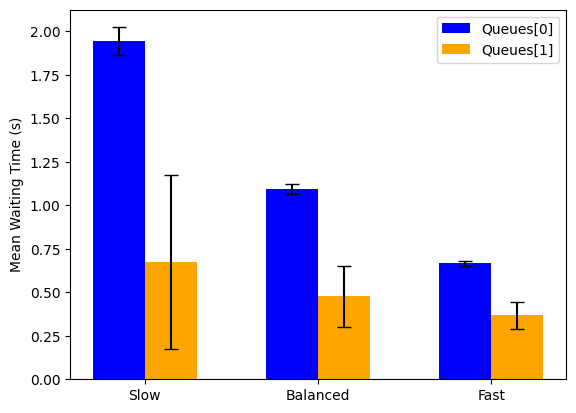

In [70]:
# width of the bars
barWidth = 0.3

# Choose the height of the bars
Q0_bars = []
Q1_bars = []
for value in consistency.values():
    Q0_bars.append(value["Q0"].mean())
    Q1_bars.append(value["Q1"].mean())


# Choose the height of the error bars 
yerr_Q0 = []
yerr_Q1 = []
for value in consistency.values():
    yerr_Q0.append(1.96 * (value["Q0"].std() / math.sqrt(n)))
    yerr_Q1.append(1.96 * (value["Q1"].std() / math.sqrt(n)))


# The x position of bars
r1 = np.arange(len(Q0_bars))
r2 = [x + barWidth for x in r1]
 
# Create Q0 bars
plt.bar(r1, Q0_bars, width = barWidth, color = 'blue', edgecolor = 'black', yerr=yerr_Q0, capsize=5, label='Queues[0]', lw=0)
 
# Create Q1 bars
plt.bar(r2, Q1_bars, width = barWidth, color = 'orange', edgecolor = 'black', yerr=yerr_Q1, capsize=5, label='Queues[1]', lw=0)
 
# General layout
plt.xticks([r + barWidth/2 for r in range(len(Q0_bars))], consistency.keys())
plt.ylabel('Mean Waiting Time (s)')
plt.legend()
 
# Show graphic
plt.show()


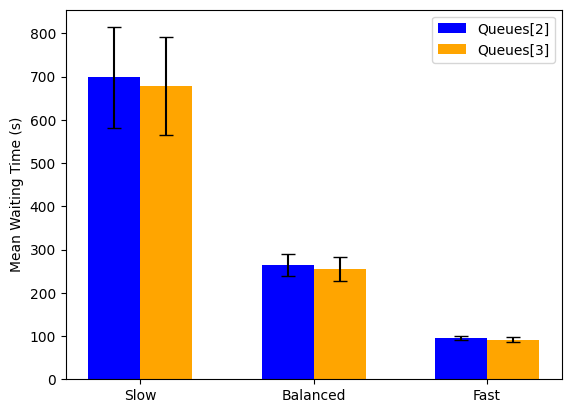

In [73]:
# width of the bars
barWidth = 0.3

# Choose the height of the bars
Q2_bars = []
Q3_bars = []
for value in consistency.values():
    Q2_bars.append(value["Q2"].mean())
    Q3_bars.append(value["Q3"].mean())


# Choose the height of the error bars 
yerr_Q2 = []
yerr_Q3 = []
for value in consistency.values():
    yerr_Q2.append(1.96 * (value["Q2"].std() / math.sqrt(n)))
    yerr_Q3.append(1.96 * (value["Q3"].std() / math.sqrt(n)))


# The x position of bars
r1 = np.arange(len(Q2_bars))
r2 = [x + barWidth for x in r1]
 
# Create Q2 bars
plt.bar(r1, Q2_bars, width = barWidth, color = 'blue', edgecolor = 'black', yerr=yerr_Q2, capsize=5, label='Queues[2]', lw=0)
 
# Create Q3 bars
plt.bar(r2, Q3_bars, width = barWidth, color = 'orange', edgecolor = 'black', yerr=yerr_Q3, capsize=5, label='Queues[3]', lw=0)
 
# General layout
plt.xticks([r + barWidth/2 for r in range(len(Q2_bars))], consistency.keys())
plt.ylabel('Mean Waiting Time (s)')
plt.legend()
 
# Show graphic
plt.show()
